# データセット作成

In [1]:
import pandas as pd

### csv読み込み

In [2]:
csv_path_fine_train = ("./datasets_csv/finetuning/train")
csv_path_fine_test = ("./datasets_csv/finetuning/test")
csv_path_pred_labeling = ("./datasets_csv/pred_labeling")

In [3]:
# ニュース記事

#df_finetuning_news = pd.read_csv(csv_path_fine + '/news/news_dataset.csv')
df_train_news = pd.read_csv(csv_path_pred_labeling + '/news/news_dataset.csv')

#print(df_finetuning_news)
print(df_train_news)


                   date                                              title  \
0   2021-01-02 08:02:00          エイベックス本社ビルが「築3年」で売却　入札額トップが落札できなかった奇々怪々\n   
1   2020-12-25 01:06:00  エイベックス(7860)、「増配」を発表し、配当利回り11.1％に！ 年間配当は1年間で2....   
2   2020-12-24 15:24:00            エイベックス、本社ビルの売却を発表　通期の純利益は150億円の黒字に転換へ\n   
3   2020-12-21 18:42:00     浜崎あゆみ、クリスマスと大みそかライブの有観客断念を発表　無観客生配信へ「残念ながら…」\n   
4   2020-11-07 17:01:00                 嵐や白石麻衣は大成功、音楽業界の「勝ち組」がごく一部だという現実\n   
5   2020-11-06 12:46:00               エイベックスが初の希望退職募集　コロナ禍でライブ・舞台関連事業に打撃\n   
6   2020-07-25 11:08:00  エンタメ業界は苦しい。でも…　「新型コロナ以前の世界が戻ってくることはない」エイベックスが見...   
7   2021-01-13 13:45:00  エイベックス、中国bilibiliとライセンス契約　J-POPのMVを提供　日本の大手レーベ...   
8   2020-08-03 06:10:00                    オンラインライブ配信はウィズコロナ時代の救世主になれるのか\n   
9   2021-01-13 11:26:00     ソニー、クリエイティブなエンターテインメント企業へ--世界4拠点からプレスカンファレンス\n   
10  2021-01-08 09:00:00                     2021年、日本アニメが世界トレンドへ飛躍する節目の年に\n   
11  2021-01-19 15:52:00                 コロナで収入源を失ったプロミュージシャン、過去作

In [4]:
# ニュースコメント

import os

csv_folder = [csv_path_fine_train , csv_path_fine_test, csv_path_pred_labeling]

file_count = 0
for p in csv_folder:
    file_count += sum((len(f) for _, _, f in os.walk(p + '/comments'))) - 1
#print(file_count)

for j, p in enumerate(csv_folder):
    cols = ['text', 'reply', 'good', 'bad']
    df_temp = pd.DataFrame(columns=cols)
    
    for i in range(file_count):
        n_file = str(i+1).zfill(3)
        file_name = "comment_dataset_" + n_file + ".csv"
        file_path = (p + "/comments/" + file_name)
        if not os.path.isfile(file_path):
            continue
        #print(str(i+1).zfill(3))#あとで消す
        df_cmt = pd.read_csv(file_path, index_col=0)
        #df_temp = pd.concat([df_temp, df_cmt], ignore_index=True)
              
        #代入
        if j <= 1:
            df_temp = pd.concat([df_temp, df_cmt], ignore_index=True)
        else:
            df_cmt.columns = ["feature", "reply", "good", "bad"]
            df_cmt[["feature", "good", "bad"]].to_csv("./datasets/pred_labeling/features_" + n_file + ".csv", index=False)
            #df_pred_comments = df_temp.copy()
        
    #代入
    if j == 0:
        df_fine_train_comments = df_temp.copy()
    elif j == 1:
        df_fine_test_comments = df_temp.copy()
        
print("finetuning train:\n", df_fine_train_comments)
print("finetuning test:\n", df_fine_test_comments)
#print("pred labeling:\n", df_pred_comments)

finetuning train:
                                                   text reply good bad
0    ハロプロの事務所も昨年末に移転しましたよね\n都内から都内だけど、複数の拠点を1拠点にまとめ...     1  278  53
1    日本の芸能プロダクションも\nアメリカのエージェントシステムに\n移行していますね！\nタレ...     0  235  45
2    エイベックスの件はともかくこれから都心の地価は下がるのではないか。これだけリモートワークが推...     3  120  17
3    その昔大学が都心から郊外や県外に脱出しました（中央大学や筑波大学など）。その結果として、人気...     1  107  20
4    河口湖は東京都心からやや遠いけれど、都心回帰で空きが増えた八王子の大学のキャンパスなんか移転...     2   70   5
..                                                 ...   ...  ...  ..
490    アニプレックス強いよね。単なる円盤屋だったのにいつの間にか市場の先頭にたっていた感じ。\n\n     0   49   5
491  イメージセンサーの分野でも、ソニーは負けてしまうのでしょうか？\n誰か詳しい人、教えて下さい...     0    1   1
492  ソニーも調子の良いうちにイメセン事業を上場もしくは売却するべき。\n今なら５兆円前後で売却可...     0    8  26
493  プレステ5でさらに勢いに乗りますね\n世界に通用する日本ブランドはSONYか任天堂だけになっ...     0   37  18
494                やはり不景気になっても強いのは子供と女性向けの商品なのだろう。\n\n     1    7  20

[495 rows x 4 columns]
finetuning test:
                                                  text reply good bad
0   イギリスから戻って来た\n布袋寅泰氏はどうするのかね

In [5]:
#ラベル
import os

csv_folder = [csv_path_fine_train , csv_path_fine_test]

#file_count = 0
#for p in csv_folder:
#    file_count += sum((len(f) for _, _, f in os.walk(p + '/comments'))) - 1
#print(file_count)

for j, p in enumerate(csv_folder):
    cols = ['label']
    df_temp = pd.DataFrame(columns=cols)

    for i in range(file_count):
        n_file = str(i+1).zfill(3)
        file_name = "comment_labels_" + n_file + ".csv"
        file_path = (p + "/labels/" + file_name)
        if not os.path.isfile(file_path):
            continue
        #print(str(i+1).zfill(3))#あとで消す
        df_labels = pd.read_csv(file_path)#, index_col=0
        # concat
        #print(df_labels)
        df_temp = pd.concat([df_temp, df_labels], ignore_index=True)

    #代入
    if j == 0:
        df_fine_train_labels = df_temp.copy()
    elif j == 1:
        df_fine_test_labels = df_temp.copy()
        
print("labels train:\n", df_fine_train_labels)
print("labels test:\n", df_fine_test_labels)

labels train:
         label
0    positive
1    positive
2    positive
3    negative
4    positive
..        ...
490  positive
491  negative
492  negative
493  positive
494  positive

[495 rows x 1 columns]
labels test:
        label
0   negative
1   negative
2   negative
3   negative
4   positive
5   negative
6   negative
7   negative
8   negative
9   positive
10  negative
11  negative
12  negative
13  negative
14  positive
15  negative
16  negative
17  negative
18  negative
19  positive


In [6]:
# データセットの作成と保存

datasets_folder =  ("./datasets/finetuning")


#print("finetuning train:\n", df_fine_train_comments)
#print("finetuning test:\n", df_fine_test_comments)
#print("pred labeling:\n", df_pred_comments)

df_fine_train_comments.columns = ["feature", "reply", "good", "bad"]
df_fine_train_comments["feature"].to_csv(datasets_folder + "/train/features.csv", index=False)

df_fine_test_comments.columns = ["feature", "reply", "good", "bad"]
df_fine_test_comments["feature"].to_csv(datasets_folder + "/test/features.csv", index=False)

#print("labels train:\n", df_fine_train_labels)
#print("labels test:\n", df_fine_test_labels)

df_fine_train_labels["label"].to_csv(datasets_folder + "/train/labels.csv", index=False)
df_fine_test_labels["label"].to_csv(datasets_folder + "/test/labels.csv", index=False)

# 上に持っていく
#df_pred_comments.columns = ["feature", "reply", "good", "bad"]
#df_pred_comments["feature"].to_csv("./datasets/pred_labeling/features.csv", index=False)

    

In [11]:
# 単語分割する関数を定義
import MeCab
import re
import string

def preprocessing_text(text):
    '''
    前処理
    '''
    # 改行コードを消去
    text = re.sub('<br />', '', text)
    text = re.sub('\n', '', text)

    # カンマ、ピリオド以外の記号をスペースに置換
    for p in string.punctuation:
        if (p == ".") or (p == ","):
            continue
        else:
            text = text.replace(p, " ")
            
    for p in string.punctuation:
        if (p == "。") or (p == "、"):
            continue
        else:
            text = text.replace(p, "　")
            
    # ピリオドなどの前後にはスペースを入れておく
    text = text.replace(".", " . ")
    text = text.replace(",", " , ")
    text = text.replace("。", " 。 ")
    text = text.replace("、", " 、 ")
    
    return text

#m_t = MeCab.Tagger('-Owakati -d /usr/lib/mecab/dic/mecab-ipadic-neologd')
#m_t = MeCab.Tagger('-Ochasen -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd')
#wakati = MeCab.Tagger("-Owakati -d /usr/local/lib/mecab/dic/mecab-ipadic-neologd")

wakati = MeCab.Tagger("-Owakati -d /usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd")
#/usr/lib/x86_64-linux-gnu/mecab/dic/mecab-ipadic-neologd

def tokenizer_mecab(text):
    '''
    分かち書き
    '''
    words = wakati.parse(text).split()
    
    return words


In [12]:
text = '機械学習が好きです。\n＋＋？？？：：機械学習が好きです。'

pre_text = preprocessing_text(text)
tokenized_text = tokenizer_mecab(pre_text)
print("tokenized:\n", tokenized_text)

tokenized:
 ['機械学習', 'が', '好き', 'です', '。', '＋', '＋', '？？？', '：', '：', '機械学習', 'が', '好き', 'です', '。']


In [13]:
text = '機械学習が好きです。\n＋＋？？？：：機械学習が好きです。'

pre_text = preprocessing_text(text)
print("pre:\n", pre_text)
tokenized_text = tokenizer_mecab(pre_text)
print("tokenized:\n", tokenized_text)
print("text tokenized:\n", len(tokenized_text))


pre:
 機械学習が好きです 。 ＋＋？？？：：機械学習が好きです 。 
tokenized:
 ['機械学習', 'が', '好き', 'です', '。', '＋', '＋', '？？？', '：', '：', '機械学習', 'が', '好き', 'です', '。']
text tokenized:
 15


In [22]:
#!pip install bert-tensorflow
#!pip install keras-bert

In [23]:
#!pip install sentencepiece

https://tech-blog.cloud-config.jp/2020-02-06-category-classification-using-bert/

In [24]:
#!git clone --recurse-submodules https://github.com/yoheikikuta/bert-japanese

## 設定ファイル

In [25]:
import pandas as pd
import sentencepiece as spm

# 学習データX
# feature.csvは上記で用意したファイルのパスを指定してください
train_features_df = pd.read_csv('./datasets/finetuning/train/features.csv')
print("train_features_df:\n", train_features_df)


# テキストの最初に[CLS]、最後に'[SEP]をつけて単語数を数える関数
def _get_indice(feature):
    tokens = []
    tokens.append('[CLS]')
    pre_text = preprocessing_text(feature)#追加
    tokenized_text = tokenizer_mecab(pre_text)#追加
    tokens.extend(tokenized_text)#追加
    #tokens.extend(sp.encode_as_pieces(feature))# sentence piece
    tokens.append('[SEP]')
    print("テキストのデータ :\n",tokens)
    number = len(tokens)
    return number

# sentence pieceでは、与えた文書の中で高い頻度で現れるフレーズは、
# 多少長くても一つの単位として認識します。
# Mecabでは対応する辞書を使って文章を分割します。辞書にはneologdとかがよく使われます。
#これでも上手くいくことも多いですが、語彙数が大きくなってしまうことや、
# 分割の仕方が分割したいデータセットに適していないこともあり、問題点
#sp = spm.SentencePieceProcessor()

# ダウンロードした事前学習モデルのパスを指定してください
#sp.Load('./downloads/bert-wiki-ja/wiki-ja.model')

numbers = []
for feature in train_features_df['feature']:
    features_number = _get_indice(feature)
    numbers.append(features_number)

print(numbers)

# 最大トークン数
max_token_num = max(numbers)
print("max_token_number: " + str(max_token_num))

train_features_df:
                                                feature
0    ハロプロの事務所も昨年末に移転しましたよね\n都内から都内だけど、複数の拠点を1拠点にまとめ...
1    日本の芸能プロダクションも\nアメリカのエージェントシステムに\n移行していますね！\nタレ...
2    エイベックスの件はともかくこれから都心の地価は下がるのではないか。これだけリモートワークが推...
3    その昔大学が都心から郊外や県外に脱出しました（中央大学や筑波大学など）。その結果として、人気...
4    河口湖は東京都心からやや遠いけれど、都心回帰で空きが増えた八王子の大学のキャンパスなんか移転...
..                                                 ...
490    アニプレックス強いよね。単なる円盤屋だったのにいつの間にか市場の先頭にたっていた感じ。\n\n
491  イメージセンサーの分野でも、ソニーは負けてしまうのでしょうか？\n誰か詳しい人、教えて下さい...
492  ソニーも調子の良いうちにイメセン事業を上場もしくは売却するべき。\n今なら５兆円前後で売却可...
493  プレステ5でさらに勢いに乗りますね\n世界に通用する日本ブランドはSONYか任天堂だけになっ...
494                やはり不景気になっても強いのは子供と女性向けの商品なのだろう。\n\n

[495 rows x 1 columns]
テキストのデータ :
 ['[CLS]', 'ハロプロ', 'の', '事務所', 'も', '昨年末', 'に', '移転', 'し', 'まし', 'た', 'よ', 'ね', '都内', 'から', '都内', 'だ', 'けど', '、', '複数', 'の', '拠点', 'を', '1', '拠点', 'に', 'まとめ', 'た', 'みたい', '経営', '立て直し', 'する', '上', 'で', '、', '固定費', 'の', '中', 'で', 'も', 'まず', '着手', 'する', 'の', 'は', '家賃', 'です', 'から', 'ね', '

 ['[CLS]', '仕事', '上', 'は', 'そんな', '一等地', 'じゃなくて', 'も', '全然', '支障', 'ない', 'から', 'ね', '。', '当然', 'だろ', 'な', '。', '[SEP]']
テキストのデータ :
 ['[CLS]', '都心', 'の', '一等地', 'に', '事務所', 'なんて', '見栄', '以外', 'の', '何者', 'で', 'も', 'ない', 'から', 'な', '。', '結果', 'エーベックス', 'みたい', 'に', 'なる', '[SEP]']
テキストのデータ :
 ['[CLS]', '本当', 'ただ', 'の', '妄想', 'コント', 'で', 'しか', 'ない', '記事', 'だ', 'ね', '[SEP]']
テキストのデータ :
 ['[CLS]', '浅草', 'を', 'バカ', 'に', 'し', 'てる', 'の', 'か', '？', '[SEP]']
テキストのデータ :
 ['[CLS]', '日本', 'の', 'ショービジネス', 'の', '人間', 'は', 'アマチュア', '。', '辞め', 'た', '方', 'が', '良い', '。', '[SEP]']
テキストのデータ :
 ['[CLS]', '足立区', 'で', 'よい', 'の', 'で', 'は', '？', '[SEP]']
テキストのデータ :
 ['[CLS]', '八王子', 'あたり', 'で', 'よく', 'ない', '？', '笑', '[SEP]']
テキストのデータ :
 ['[CLS]', '大手', 'も', 'リストラ', '状態', 'で', '飲食', 'も', 'エンタメ', 'も', '厳しい', 'し', '、', '税収', '下がっ', 'たら', '生活保護', 'も', '手一杯', 'で', '無理', '。', '若者', 'は', '納税', '増え', 'て', '年金', 'なし', '。', 'これ', 'で', '死ぬ', 'な', 'なんて', '無理ゲー', '[SEP]']
テキストのデータ :
 ['[CLS]', 'エイベックス', 'に', '限ら', 'ず', '早期退職',

 ['[CLS]', 'どの', '会社', 'も', '形', 'だけ', 'の', '仕事', 'し', 'ない', '窓際族', 'リストラ', '散々', '儲け', 'て', '稼ぎ', 'まくっ', 'て', '麻痺', 'し', 'た', '高額', 'な', '役員報酬', 'を', '限り無く', '減らす', '事', 'から', '始め', 'ない', 'と', '一生懸命', '会社', 'に', '貢献', 'し', 'て', '来', 'た', '社員', 'も', '報わ', 'れ', 'ない', '[SEP]']
テキストのデータ :
 ['[CLS]', '「', '音楽', '事業', 'の', '一部', 'と', '間接', '部門', 'に', '在籍', 'する', '40歳', '以上', '」', 'の', '言い回し', 'から', '、', '間接', '部門', 'を', '主', 'に', 'リストラ', 'する', 'と', '思う', '。', '技術', '職', 'は', '残し', '、', '技術', '手', 'に', '職', 'の', 'ない', '総務', '経理', 'や', '人事', '、', '営業', 'を', 'リストラ', 'する', 'の', 'だろ', 'う', '。', '[SEP]']
テキストのデータ :
 ['[CLS]', '40', '以上', 'って', '、', '働き盛り', 'だ', 'し', '、', 'ローン', 'だって', 'ある', 'だろ', 'う', 'に', '。', '。', '。', 'キツイ', 'なぁ', '。', '私ごと', 'だ', 'が', '、', '会社', 'の', '人事', 'やっ', 'てる', 'と', '、', '面接', 'で', '、', 'なぜ', '会社', 'を', '辞め', 'た', 'の', 'か', '？', 'って', '質問', 'は', '必ず', 'する', 'ん', 'だ', 'が', '、', 'コロナ', '理由', 'は', '8割', 'を', '占める', 'よ', '。', '世の中', 'の', '厳しさ', 'が', 'よく', 'わかる', '。', 'シーン'

テキストのデータ :
 ['[CLS]', '昔', 'は', 'やたら', 'と', '高額', 'な', 'ボーナス', '出し', 'たり', '本当に', '羽振り', 'が', 'よかっ', 'た', 'のに', 'なあ', '盛者必衰', 'の', '理', 'を', '表す', 'か', '・', '・', '・', '[SEP]']
テキストのデータ :
 ['[CLS]', '希望退職', '者', 'を', '募る', '前', 'に', '、', '薬物', '検査', '希望', '者', 'を', '募っ', 'た', '方', 'が', 'いいんじゃない', '？', '[SEP]']
テキストのデータ :
 ['[CLS]', '僕', 'は', 'エイベックス', 'の', '面接', '試験', 'に', '行き', 'まし', 'た', 'が', '不採用', 'でし', 'た', '。', '希望退職', 'は', '初めて', '聞き', 'まし', 'た', '。', 'しかしながら', '、', 'リストラ', 'も', 'おかしく', 'ありません', '[SEP]']
テキストのデータ :
 ['[CLS]', 'この', '会社', 'が', '伸び', 'た', 'の', 'と', '氷河期', 'は', 'ほぼ', 'リンク', 'する', 'けど', '氷河期', 'を', 'リストラ', 'する', 'ほど', '雇っ', 'て', 'た', 'と', 'は', '思え', 'ない', 'の', 'です', 'が', '[SEP]']
テキストのデータ :
 ['[CLS]', '感染対策', '、', '感染対策', 'と', 'ばっかり', 'いう', 'けど', '、', 'それ', '以上', 'に', '経済', '対策', 'し', 'ない', 'と', 'ほんとに', 'マズイ', 'よ', '。', '政府', 'は', '自分', '達', 'が', '緊急事態宣言', 'なんて', 'だして', '撒い', 'た', '種', '、', 'ちゃんと', '広い', '集め', 'て', 'ください', '。', '経済', 'を', '軽視', 'し', '、', '国民', 'や', '

 ['[CLS]', 'リストラ', '合戦', 'が', '始まる', 'ね', '。', '始まり', 'に', '過ぎ', 'ない', 'です', 'ね', '。', 'これから', 'です', '。', 'マネ', 'し', 'ます', 'から', '。', '[SEP]']
テキストのデータ :
 ['[CLS]', '年末', 'な', 'のに', '、', 'ガッカリ', 'ばかり', 'だ', 'ね', '。', 'サラリーマン', 'は', 'なに', 'も', '出来', 'ない', 'から', '辛い', 'な', '。', '。', '[SEP]']
テキストのデータ :
 ['[CLS]', '新しい', '豪華', 'な', '自社ビル', '造っ', 'て', 'おい', 'て', '希望退職', 'は', 'マジ', '笑える', 'まあ', '、', '昔', 'の', 'ビル', 'の', '時', 'は', '中', '、', '汚く', 'て', 'だら', 'しない', '会社', 'だ', 'な', '、', 'って', '思っ', 'た', 'けど', '。', '[SEP]']
テキストのデータ :
 ['[CLS]', '会社員', '100人', '退職', 'さ', 'せる', 'なら', '、', '役員', 'を', '2', '〜', '3人', '辞め', 'させ', 'て', '、', '会社員', 'の', '失業', 'を', '減らす', 'べき', 'じゃ', 'ない', 'か', '？', '[SEP]']
テキストのデータ :
 ['[CLS]', '氷山の一角', 'です', 'ね', '。', 'コロナ', 'を', '恐怖', 'の', '病気', 'として', '見', 'て', 'いる', '以上', '、', '景気', 'は', 'これから', 'どんどん', '悪く', 'なる', '一方', '。', '[SEP]']
テキストのデータ :
 ['[CLS]', '大規模', 'イベント', 'やれ', 'ば', '良い', 'だけ', 'じゃ', 'ない', 'の', '。', '[SEP]']
テキストのデータ :
 ['[CLS]', '40代', '以上', 'の'

## 学習

## BERTの設定ファイル、モデルのロード  
学習回数と事前に調べていた最大トークン数、ファイルパスを自分用に書き換えてください。以下に書き換える箇所を示します。  

- config_path：設定ファイルのパス  
- checkpoint_path：事前学習モデルのファイルパス  
    - 拡張子まで書かないでください  
- SEQ_LEN：最大トークン数  
- EPOCH：学習回数  

In [26]:
import sys
from keras_bert import load_trained_model_from_checkpoint

#sys.pathに追加（必要なのか調査が必要）
sys.path.append('modules')

#import pprint
#pprint.pprint(sys.path)

# BERTのロード
config_path = './downloads/bert-wiki-ja_config/bert_finetuning_config_v1.json'
# 拡張子まで記載しない（.ckptファイルで保存されている）
checkpoint_path = './downloads//bert-wiki-ja/model.ckpt-1400000'

# 最大のトークン数
SEQ_LEN = max_token_num#上の処理の出力
BATCH_SIZE = 10#16
BERT_DIM = 768
LR = 1e-4
# 学習回数
EPOCH = 30#20

# 学習ずみモデルでモデル構築
bert = load_trained_model_from_checkpoint(config_path, checkpoint_path, training=True,  trainable=True, seq_len=SEQ_LEN)
bert.summary()

# この後に追加する（転移学習）
# 分類問題用にモデルの再構築

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 224)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 224)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 224, 768), ( 24576000    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 224, 768)     1536        Input-Segment[0][0]              
______________________________________________________________________________________________

## 学習データのロード関数
こちらの関数でもモデルの読み込みを行うので、各自ファイルパスの変更をお願いします。

- sp.load("ファイルパス")

## 文章のベクトル化
_get_indice関数では、SentencePieceとwikipediaモデルを使用し文章のベクトル化を行っています

## 学習データ読込
_load_labeldata関数は学習データを読込、_get_indice関数を用いて特徴量を抽出しています。




In [27]:
from keras.utils import np_utils

In [28]:
from keras import utils
import numpy as np

# ここでもsentence piece
sp = spm.SentencePieceProcessor()
sp.Load('./downloads/bert-wiki-ja/wiki-ja.model')

# 上に同じ名前の関数があるので注意
# 最大単語数分のID化された文を返す関数
# maxlenがなくてエラーになるので勝手に追加（maxlenは最大単語数か？）
def _get_indice(feature, maxlen):
#def _get_indice(feature):
    # インデックス ０で埋める
    indices = np.zeros((maxlen), dtype = np.int32)
    # 最初に[CLS]、最後に'[SEP]をつけてトークン作る
    tokens = []
    tokens.append('[CLS]')
    pre_text = preprocessing_text(feature)#追加
    tokenized_text = tokenizer_mecab(pre_text)#追加
    tokens.extend(tokenized_text)#追加
    #tokens.extend(sp.encode_as_pieces(feature))# sentence piece
    tokens.append('[SEP]')

    for t, token in enumerate(tokens):
        # 最大単語数までトークンの単語をindicesに入れていく
        if t >= maxlen:
            break
        try:
            indices[t] = sp.piece_to_id(token)# id化してくれる？
        except:
            logging.warn(f'{token} is unknown.')# コメントしてくれる
            indices[t] = sp.piece_to_id('<unk>')# id化してくれる？unknown
    
    # 最大単語数分のID化された文を返す
    return indices


#勝手に追加 maxlen=103  
# 引数のパスは直接書けばいらないかも
def _load_labeldata(train_dir, test_dir, maxlen):
    # pandasでcsvの学習データとテストデータを読み込む
    train_features_df = pd.read_csv(f'{train_dir}/features.csv')
    train_labels_df = pd.read_csv(f'{train_dir}/labels.csv')
    test_features_df = pd.read_csv(f'{test_dir}/features.csv')
    test_labels_df = pd.read_csv(f'{test_dir}/labels.csv')
    
    ##### ラベル側の処理 #####
    
    # ラベルのユニーク値を取り出す（ラベル数）（インデックスとラベル別別に保管）
    # ネガポジなら　ポジティブ, ネガティブ と　０、１　を入れてしまえばいいと思われる
    #{'スポーツ': 0, '携帯電話': 1},
    label2index = {k: i for i, k in enumerate(train_labels_df['label'].unique())}
    #{0: 'スポーツ', 1: '携帯電話'}
    index2label = {i: k for i, k in enumerate(train_labels_df['label'].unique())}
    #　クラス数（何種類に分類するか）ネガポジなら２
    class_count = len(label2index)
    
    # Numpyユーティリティ to_categorical(y, nb_classes=None)
    # クラスベクトル（0からnb_classesまでの整数）を categorical_crossentropyとともに用いるためのバイナリのクラス行列に変換します．
    # y: 行列に変換するクラスベクトル, nb_classes: 総クラス数
    # ↓trainのラベルを文字からインデックスを使用して変換
    train_labels = utils.np_utils.to_categorical([label2index[label] for label in train_labels_df['label']], num_classes=class_count)
    #　testのインデックスをまず作る
    test_label_indices = [label2index[label] for label in test_labels_df['label']]
    # ↓testのラベルを文字からインデックスを使用して変換
    test_labels = utils.np_utils.to_categorical(test_label_indices, num_classes=class_count)

    ##### 特徴量側の処理 #####
    
    train_features = []
    test_features = []
    for feature in train_features_df['feature']:
        # 上で作った関数 _get_indice  を使ってID化
        train_features.append(_get_indice(feature, maxlen))
    # shape(len(train_features), maxlen)のゼロの行列作成
    train_segments = np.zeros((len(train_features), maxlen), dtype = np.float32)

    for feature in test_features_df['feature']:
        # 上で作った関数 _get_indice  を使ってID化
        test_features.append(_get_indice(feature, maxlen))
    # shape(len(test_features), maxlen)のゼロの行列作成
    test_segments = np.zeros((len(test_features), maxlen), dtype = np.float32)

    print(f'Trainデータ数: {len(train_features_df)}, Testデータ数: {len(test_features_df)}, ラベル数: {class_count}')

    return {
        'class_count': class_count,
        'label2index': label2index,
        'index2label': index2label,
        'train_labels': train_labels,
        'test_labels': test_labels,
        'test_label_indices': test_label_indices,
        'train_features': np.array(train_features),
        'train_segments': np.array(train_segments),
        'test_features': np.array(test_features),
        'test_segments': np.array(test_segments),
        'input_len': maxlen
    }

In [29]:
_get_indice("制作", maxlen=SEQ_LEN)

array([  4, 828,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [30]:
_load_labeldata('./datasets/finetuning/train', './datasets/finetuning/test', maxlen=SEQ_LEN)

Trainデータ数: 495, Testデータ数: 20, ラベル数: 2


{'class_count': 2,
 'label2index': {'positive': 0, 'negative': 1},
 'index2label': {0: 'positive', 1: 'negative'},
 'train_labels': array([[1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
     

## モデル作成関数

In [43]:
# おそらく、この関数を作った理由は複数分類モデルを自由に作れるようにしたかったからだ。
# 単にネガポジにするなら関数にしないで直接書けばいい。

from keras.layers import Dense, Dropout, LSTM, Bidirectional, Flatten, GlobalMaxPooling1D
from keras_bert.layers import MaskedGlobalMaxPool1D
from keras import Input, Model

# nadam を選べば使わなくてもいい
# https://github.com/CyberZHG/keras-bert
from keras_bert import AdamWarmup, calc_train_steps

def _create_model(input_shape, class_count):
    # AdamWarmupをオプティマイザーとして使用するために必要な情報を得る関数
    # nadam を選べば使わなくてもいい
    decay_steps, warmup_steps = calc_train_steps(
        input_shape[0],
        batch_size=BATCH_SIZE,
        epochs=EPOCH,
    )

    # 学習済みモデル 「bert」 の最終出力層のoutputを取り出す
    bert_last = bert.get_layer(name='NSP-Dense').output
    x1 = bert_last
    # 最終出力層のoutputを新規作成した全結合層に入れる
    output_tensor = Dense(class_count, activation='softmax')(x1)
    
    # Trainableの場合は、Input Masked Layerが3番目の入力なりますが、
    # FineTuning時には必要無いので1, 2番目の入力だけ使用します。
    # Trainableでなければkeras-bertのModel.inputそのままで問題ありません。
    model = Model([bert.input[0], bert.input[1]], output_tensor)
    model.compile(loss='categorical_crossentropy',
                  optimizer=AdamWarmup(decay_steps=decay_steps, warmup_steps=warmup_steps, lr=LR),
                  #optimizer='nadam',
                  metrics=['mae', 'mse', 'acc'])

    return model

## 学習データのロードとモデルの準備
事前準備で作成した学習用データと学習後のモデル名および出力先を指定してください。

- trains_dir,tests_dir：学習用データのパス
- model_filename：学習後のモデル名、出力先のパス



In [44]:
#import keras.utils

In [45]:
#from keras.utils import np_utils

In [46]:
#from keras import Input, Model, utils
#import numpy as np

In [47]:
# データロードとモデルの準備
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

trains_dir = './datasets/finetuning/train'
tests_dir = './datasets/finetuning/test'

#上で作った関数
data = _load_labeldata(trains_dir, tests_dir, SEQ_LEN)

# モデルの読み込み
model_filename = './downloads/models/knbc_finetuning.model'

# 上で作った関数（関数を使わずに直接書くこともできる）
# data['train_features'].shape　は　文の数×最大単語数　＝　特徴量Xのインプットshape
# data['class_count']　は　クラスの数
model = _create_model(data['train_features'].shape, data['class_count'])

model.summary()

Trainデータ数: 495, Testデータ数: 20, ラベル数: 2
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input-Token (InputLayer)        [(None, 224)]        0                                            
__________________________________________________________________________________________________
Input-Segment (InputLayer)      [(None, 224)]        0                                            
__________________________________________________________________________________________________
Embedding-Token (TokenEmbedding [(None, 224, 768), ( 24576000    Input-Token[0][0]                
__________________________________________________________________________________________________
Embedding-Segment (Embedding)   (None, 224, 768)     1536        Input-Segment[0][0]              
______________________________________________________

## 学習の実行
いよいよ学習の実行です。以下のプログラムを実行した際に画像のような出力が出ると思います。（tensorflowのバージョンでWarningが出ますが問題ありません）あとはお茶でも飲みながら学習経過を観察してみましょう！

ファインチューニング？

In [48]:
history = model.fit([data['train_features'], data['train_segments']],
          data['train_labels'],
          #epochs = 3,
          epochs = EPOCH,
          batch_size = BATCH_SIZE,
          validation_data=([data['test_features'], data['test_segments']], data['test_labels']),
          shuffle=False,
          verbose = 1,
          callbacks = [
              ModelCheckpoint(monitor='val_acc', mode='max', filepath=model_filename, save_best_only=True)
          ])


Epoch 1/30
50/50 [==============================] - 111s 1s/step - loss: 0.7011 - mae: 0.3382 - mse: 0.2265 - acc: 0.7279 - val_loss: 0.6144 - val_mae: 0.2434 - val_mse: 0.1796 - val_acc: 0.8000
INFO:tensorflow:Assets written to: ./downloads/models/knbc_finetuning.model/assets
Epoch 2/30
50/50 [==============================] - 60s 1s/step - loss: 0.7342 - mae: 0.3413 - mse: 0.2316 - acc: 0.7279 - val_loss: 0.6732 - val_mae: 0.2330 - val_mse: 0.1854 - val_acc: 0.8000
Epoch 3/30
50/50 [==============================] - 60s 1s/step - loss: 0.6071 - mae: 0.3351 - mse: 0.2035 - acc: 0.7381 - val_loss: 0.7324 - val_mae: 0.2235 - val_mse: 0.1892 - val_acc: 0.8000
Epoch 4/30
50/50 [==============================] - 60s 1s/step - loss: 0.4682 - mae: 0.2835 - mse: 0.1531 - acc: 0.7836 - val_loss: 0.8245 - val_mae: 0.2132 - val_mse: 0.1930 - val_acc: 0.8000
Epoch 5/30
50/50 [==============================] - 61s 1s/step - loss: 0.3128 - mae: 0.2050 - mse: 0.0965 - acc: 0.8570 - val_loss: 0.9020 

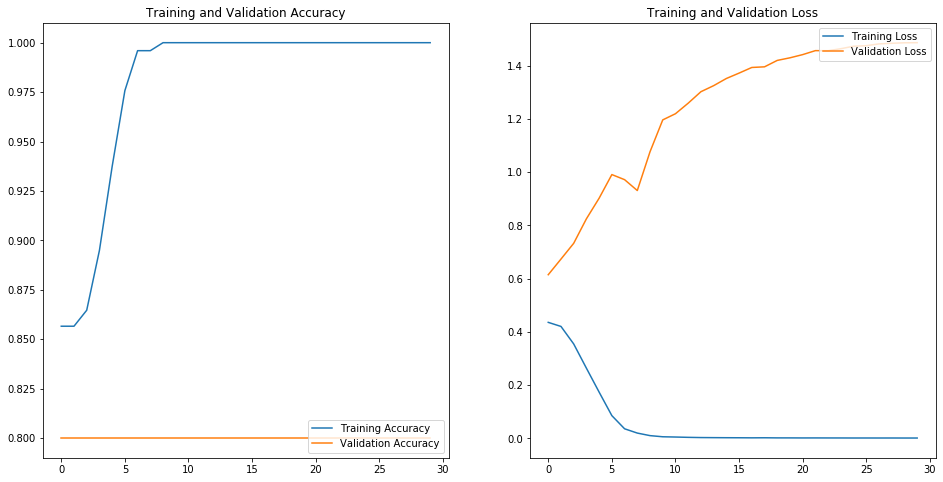

In [49]:
import matplotlib.pyplot as plt

acc = history.history['acc']#accuracy
val_acc = history.history['val_acc']#val_accuracy

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCH)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 推論時にAttention Weightを出力するようにモデルをロードする

https://qiita.com/hideki/items/038ead2880de5edf1fef

## 予測 TEST

In [53]:
tests_features_df = pd.read_csv('./datasets/pred_labeling/features_001.csv')
tests_features_df.loc[0]['feature']

'イギリスから戻って来た\n布袋寅泰氏はどうするのかね\n緊急事態宣言に\n劇場とかは含まれないみたいだけど\n全国からファンを\n武道館に来させるのかな\n中止もしくは\n武道館に来なくても払い戻しします\n位の措置は取った方がいいと思う\n\n'

In [54]:
import sys
import pandas as pd
import sentencepiece as spm
import logging
import numpy as np

from keras import utils
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras_bert import load_trained_model_from_checkpoint
from keras_bert import get_custom_objects
from sklearn.metrics import classification_report, confusion_matrix


#sys.pathに追加（必要なのか調査が必要）
sys.path.append('modules')

# SentencePieceProccerモデルの読込
spp = spm.SentencePieceProcessor()
spp.Load('./downloads/bert-wiki-ja/wiki-ja.model')

# BERTの学習したモデルの読込（ダウンロードした？勝手に保存される？）
model_filename = './downloads/models/knbc_finetuning.model'
model = load_model(model_filename, custom_objects=get_custom_objects())
#model = load_model(model_filename, custom_objects=SeqSelfAttention.get_custom_objects())
model = Model(inputs=model.input, outputs=[model.output, model.get_layer('Encoder-12-MultiHeadSelfAttention').output])
# ↑ここでmodel = Model(inputs=a, outputs=b) としてAttentionも出すようにする。


# 上のと同じのを入れると思われるため、消していいかも(ファイルを分けるなら必要)
#SEQ_LEN = 103#206
maxlen = SEQ_LEN
#
# 上にあったのと同じ？ → predictように変更
def _get_indice_pred(feature, maxlen):
    indices = np.zeros((maxlen), dtype=np.int32)

    tokens = []
    tokens.append('[CLS]')
    pre_text = preprocessing_text(feature)#追加
    tokenized_text = tokenizer_mecab(pre_text)#追加
    tokens.extend(tokenized_text)#追加
    #tokens.extend(spp.encode_as_pieces(feature))
    tokens.append('[SEP]')

    for t, token in enumerate(tokens):
        if t >= maxlen:
            break
        try:
            indices[t] = spp.piece_to_id(token)
        except:
            logging.warn('unknown')
            indices[t] = spp.piece_to_id('<unk>')
            
    return indices, tokens

tests_features_df = pd.read_csv('./datasets/pred_labeling/features_001.csv')
feature = tests_features_df.loc[0]['feature']
#feature = "昨日は携帯電話を買いに行った。"
#feature = "昨日はスポーツしに行った。"

test_features = []
indices, tokens = _get_indice_pred(feature, maxlen)
test_features.append(indices)

#勝手に追加
test_features = np.array(test_features)

test_segments = np.zeros(
    (len(test_features), maxlen), dtype=np.float32)


# model = Modelを使えば推定　predict[0][0]　２次元のリストで返せる。
predicted_test_labels = model.predict([test_features, test_segments])#.argmax(axis=1)
#predict = model.predict(test_features)


print("完了")

完了


In [55]:
print(tokens)

['[CLS]', 'イギリス', 'から', '戻っ', 'て', '来', 'た', '布袋寅泰', '氏', 'は', 'どう', 'する', 'の', 'か', 'ね', '緊急事態宣言', 'に', '劇場', 'とか', 'は', '含ま', 'れ', 'ない', 'みたい', 'だ', 'けど', '全国', 'から', 'ファン', 'を', '武道館', 'に', '来さ', 'せる', 'の', 'か', 'な', '中止', 'もしくは', '武道', '館', 'に', '来', 'なく', 'て', 'も', '払い戻し', 'し', 'ます', '位', 'の', '措置', 'は', '取っ', 'た', '方', 'が', 'いい', 'と', '思う', '[SEP]']


In [56]:

print("shape: ", len(predicted_test_labels))
#print("predicted_test_labels: ", predicted_test_labels)
print("predict: ", predicted_test_labels[0])
print("predict: ", predicted_test_labels[0].argmax(axis=1))
print("attention:", predicted_test_labels[1].shape)
print("attention:\n", predicted_test_labels[1])
print("attention:\n", predicted_test_labels[1].argmax(axis=1))#axis=1
print("attention:\n", predicted_test_labels[1].argmax(axis=1).shape)#axis=1

shape:  2
predict:  [[0.06661171 0.9333883 ]]
predict:  [1]
attention: (1, 224, 768)
attention:
 [[[-0.14821841  0.04755016 -0.40155712 ... -0.41912442 -0.35955226
   -0.10513961]
  [-0.17677696  0.15556525 -0.39960834 ... -0.49285358 -0.39194041
    0.1395995 ]
  [ 0.02952663  0.53316844 -0.32661188 ... -0.80742645  0.31141075
   -0.19809437]
  ...
  [ 0.07043695 -0.02493227 -0.3303368  ... -0.31262946 -0.35077795
   -0.01673227]
  [ 0.1031414   0.01821099 -0.35906237 ... -0.2884867  -0.40330735
    0.15574947]
  [-0.08837845  0.0704698  -0.06250576 ... -0.21790004 -0.40218
    0.09888972]]]
attention:
 [[ 29  23  10  44  12   4   6  35  52  43  59  12  55  35  18  42   2  35
   18  57   4  36  35  10  18  43  35   6  34  34 128  34  34  10   5  57
    5  24   5  27  21  24  36  29  57  24  42   5  43  34  57  11  24  31
   52  45  27  57  12  35  58  34  24  17  11   5   3  58  58  34   2  22
   35  27  22  37  59  63  34  36  59  34   2  45  43   7  35  58  34  52
   19   2  22  27 

_____________
Encoder-12-MultiHeadSelfAttenti (None, 206, 768)     0           Encoder-11-FeedForward-Norm[0][0]
                                                                 Encoder-12-MultiHeadSelfAttention
__________________________________________________________________________________________________
Encoder-12-MultiHeadSelfAttenti (None, 206, 768)     1536        Encoder-12-MultiHeadSelfAttention

In [ ]:
import types

In [59]:
import types
# 入力シーケンスはpad_sequenceにより、以下の様に0でpre paddingしています。
# [0 0 0 0 x1(300) x2(300) x3(300)]
# Attention Weightは入力シーケンスに対応して計算されるため、
# 入力シーケンスのpadding分シフトします。
weights = [w.max() for w in predicted_test_labels[1][0][-len(tokens):]]
df = pd.DataFrame([tokens, weights], index=['token', 'weight']).T

mean = np.asarray(weights).mean()#np.asarray　参照コピー

df['rank'] = df['weight'].rank(ascending=False)#ランキング
# wから平均を引いた値が0より大きいものだけ（偏差）
# 数字の時だけ計算する

#print(mean)
#display(type(df.loc[220]['weight']))
df['normalized'] = df['weight'].apply(lambda w: 0 if type(w) == types.NoneType else max(w - mean, 0))
#df['normalized'] = df['weight'].apply(lambda w: max(w - mean, 0))#行全体や列全体に対して、同じ操作
df['weight'] = df['weight'].astype('float32')
df['attention'] = df['normalized'] > 0
# df.style.background_gradient で色つけ
df = df.style.background_gradient(cmap='Blues', subset=['normalized'])

display(df)

AttributeError: module 'types' has no attribute 'NoneType'

## 予測 EXCEL 出力

In [60]:
import types

In [61]:
import sys
import pandas as pd
import sentencepiece as spm
import logging
import numpy as np

from keras import utils
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras_bert import load_trained_model_from_checkpoint
from keras_bert import get_custom_objects
from sklearn.metrics import classification_report, confusion_matrix

import openpyxl

#sys.pathに追加（必要なのか調査が必要）
sys.path.append('modules')

# 上にあったのと同じ？ → predict用に変更
def _get_indice_pred(feature, maxlen):
    indices = np.zeros((maxlen), dtype=np.int32)

    tokens = []
    tokens.append('[CLS]')
    pre_text = preprocessing_text(feature)#追加
    tokenized_text = tokenizer_mecab(pre_text)#追加
    tokens.extend(tokenized_text)#追加
    #tokens.extend(spp.encode_as_pieces(feature))
    tokens.append('[SEP]')

    for t, token in enumerate(tokens):
        if t >= maxlen:
            break
        try:
            indices[t] = spp.piece_to_id(token)
        except:
            logging.warn('unknown')
            indices[t] = spp.piece_to_id('<unk>')
            
    return indices, tokens


# SentencePieceProccerモデルの読込
spp = spm.SentencePieceProcessor()
spp.Load('./downloads/bert-wiki-ja/wiki-ja.model')

# BERTの学習したモデルの読込（ダウンロードした？勝手に保存される？）
model_filename = './downloads/models/knbc_finetuning.model'
model = load_model(model_filename, custom_objects=get_custom_objects())
#model = load_model(model_filename, custom_objects=SeqSelfAttention.get_custom_objects())
model = Model(inputs=model.input, outputs=[model.output, model.get_layer('Encoder-12-MultiHeadSelfAttention').output])
# ↑ここでmodel = Model(inputs=a, outputs=b) としてAttentionも出すようにする。


# 上のと同じのを入れると思われるため、消していいかも(ファイルを分けるなら必要)
#SEQ_LEN = 103#206
maxlen = SEQ_LEN

y_train = []
for i in range(file_count):
#for i in range(3):
    n_file = str(i+1).zfill(3)
    file_name = "features_" + n_file + ".csv"
    f_path = ("./datasets/pred_labeling/" + file_name)
    if not os.path.isfile(f_path):
        continue

    df_tests_features = pd.read_csv(f_path)
    print("File Name: ", file_name)
    
    #excelファイル保管用
    excel_file = './attention_excel/attention_' + n_file + '.xlsx'
    writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')
        
    wb = openpyxl.Workbook()
    sheet = wb.active
    sheet.title = 'Cover'
    c1 = sheet["A1"]
    c2 = sheet["A2"]
    c1.value =  "Attention出力用ファイルです。"
    c2.value =  "詳細は次のシート以降を参照してください。"
    wb.save(excel_file)
        
        
    pred_list = []
    good_ratio_list = []
    for j in range(len(df_tests_features)):
#    for j in range(2):
        feature = df_tests_features.loc[j]['feature']

        test_features = []
        indices, tokens = _get_indice_pred(feature, maxlen)
        test_features.append(indices)

        #勝手に追加
        test_features = np.array(test_features)

        test_segments = np.zeros(
            (len(test_features), maxlen), dtype=np.float32)

        # model = Modelを使えば推定　predict[0][0]　２次元のリストで返せる。
        predicted = model.predict([test_features, test_segments])#.argmax(axis=1)
        #predict = model.predict(test_features)

        y_pred = predicted[0].argmax(axis=1)
        #print("tokens: ", tokens)
        #print("predict: ", y_pred[0])
        
        if y_pred[0] > 0.5:
            pred_list.append([1])
        else:
            pred_list.append([-1])
        
        
        # 高評価度算出
        good = df_tests_features.loc[j]['good']
        bad = df_tests_features.loc[j]['bad']
        
        if bad == 0:
            good_ratio = [0]
        else:
            good_ratio = [good/bad]
        
        good_ratio_list.append(good_ratio)
        
        
        # 入力シーケンスはpad_sequenceにより、以下の様に0でpre paddingしています。
        # [0 0 0 0 x1(300) x2(300) x3(300)] ←３００は (None, 11, 300) の
        # Attention Weightは入力シーケンスに対応して計算されるため、
        # 入力シーケンスのpadding分シフトします。
        #weights = [w.max() for w in predicted[1][0][-len(tokens):]]
        weights = [w.max() for w in predicted[1][0]]#[-len(tokens):]
        df = pd.DataFrame([tokens, weights], index=['token', 'weight']).T

        mean = np.asarray(weights).mean()#np.asarray　参照コピー

        df['rank'] = df['weight'].rank(ascending=False)#ランキング
        # wから平均を引いた値が0より大きいものだけ（偏差）
        df['normalized'] = df['weight'].apply(lambda w: 0 if type(w) == type(None) else max(w - mean, 0))#types.NoneType
        #df['normalized'] = df['weight'].apply(lambda w: max(w - mean, 0))#行全体や列全体に対して、同じ操作
        df['weight'] = df['weight'].astype('float32')
        df['attention'] = df['normalized'] > 0
        # df.style.background_gradient で色つけ
        df = df.style.background_gradient(cmap='Blues', subset=['normalized'])

        # excel に保存
        sheetname="comment" + str(j)
        with pd.ExcelWriter(excel_file, engine="openpyxl", mode="a") as writer:
            df.to_excel(writer, sheet_name=sheetname, index=False)
        
        #display(df)
    
    # 加重平均が０より大きいか
    y = np.array(pred_list)*np.array(good_ratio_list)
    
    if y.mean() > 0:
        y_train.append(1) 
    else:
        y_train.append(0) 
        
    print("pred_list: ", pred_list)
    print("good_ratio_list: ", good_ratio_list)
    print()

y_train_df = pd.DataFrame(y_train)
y_train_df.columns = ["label"]
y_train_df.to_csv("./datasets/y_train.csv")
print("y_train: ", y_train)
        

File Name:  features_001.csv
pred_list:  [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
good_ratio_list:  [[7.961538461538462], [11.466666666666667], [2.0555555555555554], [13.714285714285714], [13.25], [2.2], [0], [4.0], [0], [4.857142857142857]]

File Name:  features_003.csv
pred_list:  [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], 

pred_list:  [[1], [1], [1], [1], [1], [1], [1], [1], [1]]
good_ratio_list:  [[7.571428571428571], [6.916666666666667], [0], [3.125], [3.0], [1.3333333333333333], [0.5], [0.3333333333333333], [2.3333333333333335]]

File Name:  features_008.csv
pred_list:  [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
good_ratio_list:  [[9.193103448275862], [6.739130434782608], [8.397260273972602], [9.244444444444444], [9.5], [10.791666666666666], [8.285714285714286], [9.789473684210526], [9.666666666666666], [4.527272727272727], [14.5], [7.090909090909091], [7.111111111111111], [18.0], [5.5], [5.454545454545454], [2.6153846153846154], [1.3333333333333333], [2.40625], [0], [3.0], [4.0], [2.2083333333333335], [0.5],

pred_list:  [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
good_ratio_list:  [[5.875], [4.555555555555555], [1.4285714285714286], [2.6153846153846154], [5.428571428571429], [1.3333333333333333], [1.15], [2.5], [0.46153846153846156], [1.3529411764705883], [2.4], [0], [4.285714285714286], [7.0], [1.1904761904761905], [1.0], [0.0], [0.0]]

File Name:  features_012.csv
pred_list:  [[1], [1]]
good_ratio_list:  [[4.833333333333333], [1.2692307692307692]]

File Name:  features_013.csv
pred_list:  [[1]]
good_ratio_list:  [[0.42857142857142855]]

File Name:  features_014.csv
pred_list:  [[1]]
good_ratio_list:  [[1.1666666666666667]]

File Name:  features_015.csv
pred_list:  [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
good_ratio_list:  [[6.85], [18.0], [5.529411764705882], [29.0], [0], [10.666666666666666], [0], [12.0], [8.0], [0], [4.0], [0.3333333333333333], [0], [

# ↑完成

以上